In [1]:
import pandas as pd
import numpy as np
import datetime

In [2]:
'''
import pandas_datareader as web
Top10CC = ['BTC-USD', 'ETH-USD', 'USDT-USD', 'XRP-USD', 'BCH-USD', 'BNB-USD', 'LINK-USD', 'ADA-USD', 'LTC-USD',
           'EOS-USD']
hisPrices = pd.DataFrame()
for cc in Top10CC:
    hisPrices[cc] = web.DataReader(cc, 'yahoo', '4/1/2020', datetime.date.today())['Adj Close']
'''

"\nimport pandas_datareader as web\nTop10CC = ['BTC-USD', 'ETH-USD', 'USDT-USD', 'XRP-USD', 'BCH-USD', 'BNB-USD', 'LINK-USD', 'ADA-USD', 'LTC-USD',\n           'EOS-USD']\nhisPrices = pd.DataFrame()\nfor cc in Top10CC:\n    hisPrices[cc] = web.DataReader(cc, 'yahoo', '4/1/2020', datetime.date.today())['Adj Close']\n"

In [3]:
from yahoo_fin.stock_info import get_data
Top10CC = ['BTC-USD', 'ETH-USD', 'USDT-USD', 'XRP-USD', 'BCH-USD', 'BNB-USD', 'LINK-USD', 'ADA-USD', 'LTC-USD',
           'EOS-USD']
hisPrices = {}
for cc in Top10CC:
    hisPrices[cc] = get_data(cc, '1/1/2019', datetime.date.today(),True, '1wk')
    
Prices = pd.DataFrame(index=np.arange(hisPrices['BTC-USD'].shape[0]),columns = Top10CC)
Prices.set_index(hisPrices['BTC-USD'].index, inplace = True)
for x in hisPrices:
    Prices[x] = hisPrices[x].adjclose
hisPrices.clear

<function dict.clear>

In [4]:
Prices

,BTC-USD,ETH-USD,USDT-USD,XRP-USD,BCH-USD,BNB-USD,LINK-USD,ADA-USD,LTC-USD,EOS-USD
2019-01-01,4025.248291,151.699219,1.013987,0.364347,161.243973,6.291411,0.376474,0.047996,37.806274,2.768176
2019-01-08,3706.052246,129.068726,1.020856,0.333766,133.979843,6.159282,0.485660,0.044059,32.358242,2.479065
2019-01-15,3576.032471,117.157852,1.013376,0.320790,122.829605,6.553025,0.503412,0.042937,31.212870,2.353150
2019-01-22,3470.450439,106.589973,1.008830,0.294863,112.496063,6.206182,0.413490,0.038772,31.199259,2.250317
2019-01-29,3459.154053,107.821602,0.999826,0.300198,119.124779,7.100500,0.394452,0.037857,34.108627,2.400352
...,...,...,...,...,...,...,...,...,...,...
2020-10-19,13075.248047,393.888306,1.000958,0.248688,259.782593,31.154560,11.747903,0.103097,56.745777,2.628513
2020-10-27,13550.489258,383.156738,1.000523,0.235421,257.199707,27.883930,10.797579,0.092143,53.817482,2.430644
2020-11-03,15332.315430,444.163055,1.000653,0.250748,263.981323,28.018021,12.520736,0.105325,59.363884,2.499384
2020-11-10,16716.111328,459.940308,1.000412,0.285520,250.139297,28.064110,12.590791,0.104008,71.326248,2.575720


In [5]:
returns = np.log(Prices/Prices.shift(1)).fillna(value=0) #log(R_t/R_t-1)

In [6]:
'''
raw_returns = np.log(hisPrices.shift(1)/hisPrices.shift(2)).fillna(value=0) #log(R_t/R_t-1)
## raw_returns = ((hisPrices.shift(1)/hisPrices.shift(2))-1).fillna(value=0) # R_t/R_t-1 -1
returns = raw_returns.drop(raw_returns.index[0:2])
print(returns)
'''

'\nraw_returns = np.log(hisPrices.shift(1)/hisPrices.shift(2)).fillna(value=0) #log(R_t/R_t-1)\n## raw_returns = ((hisPrices.shift(1)/hisPrices.shift(2))-1).fillna(value=0) # R_t/R_t-1 -1\nreturns = raw_returns.drop(raw_returns.index[0:2])\nprint(returns)\n'

In [7]:
mean = returns.mean()
cov = returns.cov()
std = returns.std()

In [8]:
from functools import reduce
import matplotlib.pyplot as plt

In [9]:
mean.sort_values()

XRP-USD    -0.002179
EOS-USD    -0.000291
USDT-USD   -0.000137
BCH-USD     0.004525
LTC-USD     0.006643
ADA-USD     0.007941
ETH-USD     0.011271
BTC-USD     0.014356
BNB-USD     0.015230
LINK-USD    0.035595
dtype: float64

Text(0, 0.5, 'return')

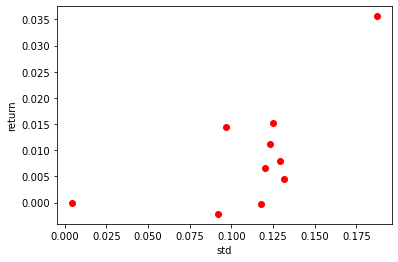

In [10]:
plt.plot(std,mean,'ro')
plt.xlabel('std')
plt.ylabel('return')

In [11]:
std_portfolio = []
return_portfolio = []

for _ in range(10000):
    w = np.random.rand(len(Top10CC))
    w /= sum(w)
    return_portfolio.append(sum(w*mean))
    std_portfolio.append(np.sqrt(reduce(np.dot,[w,cov,w.T])))

Text(0, 0.5, 'return')

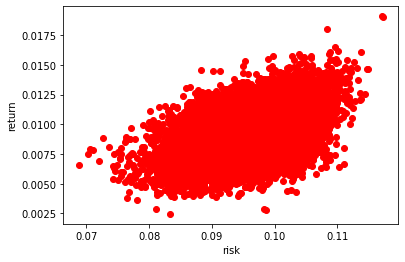

In [12]:
plt.plot(std_portfolio,return_portfolio,'ro')
plt.xlabel('risk')
plt.ylabel('return')

In [13]:
import scipy.optimize as solver

In [14]:
def std(w):
    return np.sqrt(reduce(np.dot,[w,cov,w.T]))

w0 = np.array([1/len(Top10CC) for x in range(len(Top10CC))])
bounds = tuple((0,1) for x in range(len(Top10CC)))
constraints = [{'type':'eq','fun': lambda x: sum(x) - 1}, {'type':'eq', 'fun': lambda x: sum(x*mean) - .003}]

outcome = solver.minimize(std, x0=w0, constraints = constraints, bounds = bounds)

In [20]:
np.set_printoptions(suppress=True)

In [21]:
outcome

     fun: 0.004472744953631976
     jac: array([0.0208, 0.0172, 0.0045, 0.0106, 0.0122, 0.0045, 0.036 , 0.005 ,
       0.0185, 0.0153])
 message: 'Optimization terminated successfully'
    nfev: 88
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([0.    , 0.    , 0.9964, 0.    , 0.    , 0.0029, 0.    , 0.0007,
       0.    , 0.    ])

In [16]:
sum(outcome.x * mean)

0.0030000000000186605

In [17]:
np.set_printoptions(precision=4,suppress=True)

In [18]:
return_change_range = np.arange(0.000,0.0002,0.000005)
risk = []
for i in return_change_range:
    constraints = [{'type':'eq','fun': lambda x: sum(x) - 1}, {'type':'eq', 'fun': lambda x: sum(x*mean) - i}]
    outcome = solver.minimize(std, x0=w0, constraints = constraints, bounds = bounds)
    risk.append(outcome.fun)

Text(0, 0.5, 'portfolio return')

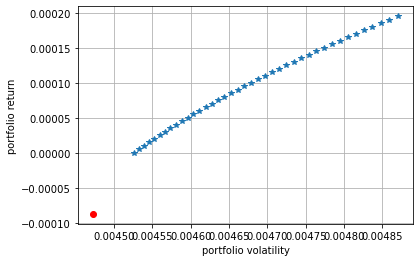

In [19]:
constraints = [{'type':'eq','fun': lambda x: sum(x) - 1}]
outcome = solver.minimize(std, x0=w0, constraints = constraints, bounds = bounds)
plt.plot(outcome.fun, sum(outcome.x*mean), 'ro')
plt.plot(risk, return_change_range,'*')
plt.grid(True)
plt.xlabel('portfolio volatility')
plt.ylabel('portfolio return')